In [198]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [41]:
with open('rftdat.pkl', 'rb') as readfile:
    jsdata = pickle.load(readfile)

In [44]:
# Create a set to collect unique keys from "oneSecondAggregatedEventCounts" dictionaries
unique_keys = set()
    
# Iterate through the list of JSON objects and collect unique keys
for obj in jsdata:
    if "oneSecondAggregatedEventCounts" in obj:
        event_counts = obj["oneSecondAggregatedEventCounts"]
        unique_keys.update(event_counts.keys())

# Convert the set of unique keys to a list if needed
unique_keys_list = list(unique_keys)

# Print the unique keys
print("Unique oneSecondAggregatedEventCounts keys:")
for key in unique_keys_list:
    print(key)

Unique oneSecondAggregatedEventCounts keys:
restore_purchases
social_feed_hide
start_dawn_ancestor_cutscene
revamp_intro_mural_02
audio_settings_changed
spiritshop_menu_opened
shared_memory_stop
candle_accepted
candle_forge_failed
dawnend_door
player_joined
player_left
social_feed_follow
star_tag_verify_success
first_loaded_Dawn
was_charged_by_player
crossplay_disabled
giftmessage_recv
candle_forged
ping
healed_player
on_suspend
userid_changed
control_settings_opened
constellation_gate_unlock
find_prev_game_request
control_settings_closed
audio_settings_closed
make_new_friend
got_wax
first_bridge
star_tag_verify_cooldown
player_lift
shared_memory_record_stop
shared_memory_play
first_hill
wingbuff_drop
player_shout
open_ability_menu
web_remote_discovered
instrument_activity
account_resource_finished
carry_collectible
collected_collectible
quest_completed
finish_climb
first_time_tutorial_loaded
on_pause
audio_settings_opened
sheetmusic_joined
leave_tunnel
first_blaze
hand_held
account_se

In [151]:
def find_ids_with_event_counts(json_objects):
    """
    Find "user_id"s in a list of JSON objects and collect their different oneSecondAggregatedEventCounts.

    Args:
        json_objects (list): A list of JSON objects.

    Returns:
        dict: A dictionary where keys are "user_id"s, and values are lists of different oneSecondAggregatedEventCounts events.
    """
    user_event_counts = {}

    for obj in json_objects:
        user_id = obj["user_id"]
        event_counts = obj["oneSecondAggregatedEventCounts"]
        
        if user_id not in user_event_counts:
            user_event_counts[user_id] = {}
        
        for k in event_counts.keys():
            if k not in user_event_counts[user_id]:
                user_event_counts[user_id][k] = event_counts[k]
            else:
                user_event_counts[user_id][k] += event_counts[k]

    return user_event_counts

In [152]:
user_event_counts = find_ids_with_event_counts(jsdata)

In [211]:
user_event_counts[8323]['ping']

47

In [172]:
tmin = jsdata[-1]['time']

In [47]:
max_ping_user = None, float('-inf')

if user_event_counts:
    print("IDs with multiple matching objects:")
    print(f"Total #users: {len(user_event_counts)}")
    
    for id_val, event_counter in user_event_counts.items():
        ping = event_counter['ping'] if 'ping' in event_counter else 0
        
        if ping > max_ping_user[1]:
            max_ping_user = id_val, ping
#         print(f"ID: {id_val}, Count: {event_counter}")
else:
    print("No IDs found with multiple matching objects")

IDs with multiple matching objects:
Total #users: 68368


<IPython.core.display.Javascript object>


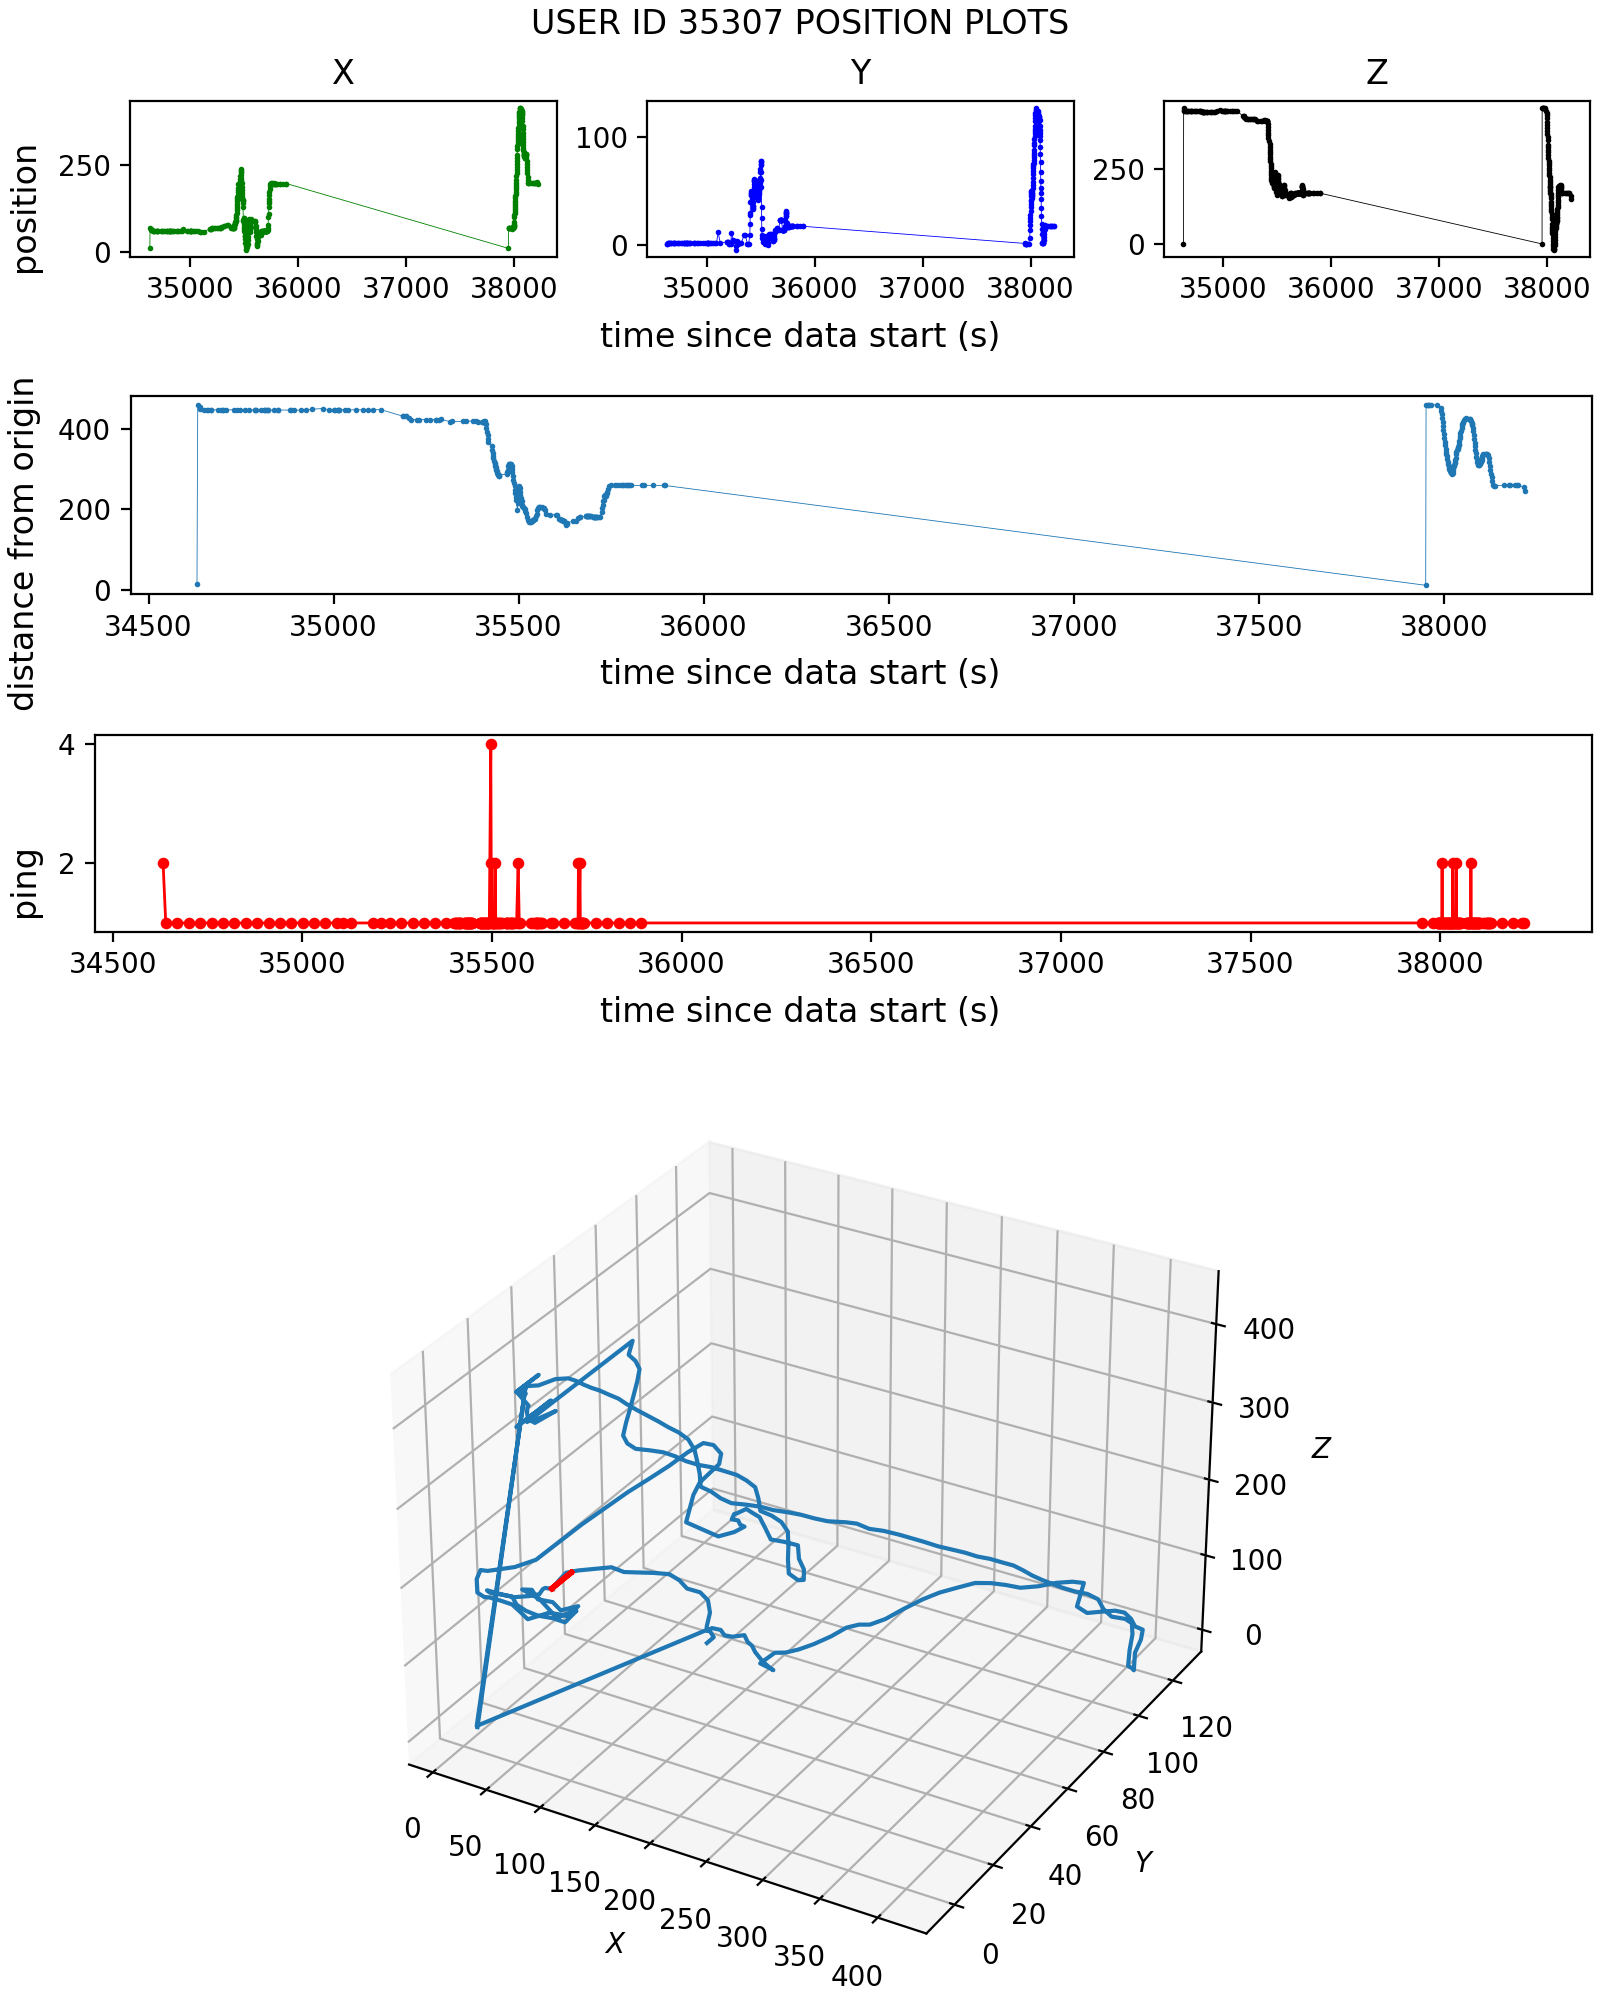

Text(0.5, 0.01, 'time since data start (s)')

In [235]:
uid_to_plot = 35307

fig = plt.figure(figsize=(8,10), layout='constrained')
fig.suptitle(f'USER ID {uid_to_plot} POSITION PLOTS')
udf = [x for x in jsdata if x['user_id'] == uid_to_plot]

(subfig_t, subfig_m, subfig_b, subfig_bb) = fig.subfigures(4, 1, hspace=0.05, height_ratios=[1,1,1,3])
ax_ping = subfig_b.subplots()
ax_dor = subfig_m.subplots()

gs = subfig_t.add_gridspec(nrows=1, ncols=3)
ax_px = subfig_t.add_subplot(gs[0, 0])
ax_py = subfig_t.add_subplot(gs[0, 1])
ax_pz = subfig_t.add_subplot(gs[0, 2])

ax_3d = subfig_bb.add_subplot(projection='3d')

px = np.array([x['position_x'] for x in udf])
py = np.array([x['position_y'] for x in udf])
pz = np.array([x['position_z'] for x in udf])
ts = np.array([x['time']-tmin for x in udf])

ax_px.scatter(ts, px, label='x', s=1, c='g')
ax_px.plot(ts, px, label='x', lw=0.3, c='g')

ax_py.scatter(ts, py, label='y', s=1, c='b')
ax_py.plot(ts, py, label='y', lw=0.3, c='b')

ax_pz.scatter(ts, pz, label='z', s=1, c='k')
ax_pz.plot(ts, pz, label='z', lw=0.3, c='k')

ax_px.set_title('X')
ax_py.set_title('Y')
ax_pz.set_title('Z')


ax_dor.scatter(ts, np.sqrt(px**2+py**2+pz**2), s=1)
ax_dor.plot(ts, np.sqrt(px**2+py**2+pz**2), lw=0.3)

ndf = [x for x in udf if 'ping' in x['oneSecondAggregatedEventCounts']]
ax_ping.plot([x['time']-tmin for x in ndf], [x['oneSecondAggregatedEventCounts']['ping'] for x in ndf], label='x', c='r', lw=1)
ax_ping.scatter([x['time']-tmin for x in ndf], [x['oneSecondAggregatedEventCounts']['ping'] for x in ndf], label='x', s=10, c='r')

ax_3d.plot(px, py, pz)

idxs = [np.where(ts==35719.0)[0][0], np.where(ts==35661.0)[0][0]]
xsel = px[idxs[0]:idxs[1]]
ysel = py[idxs[0]:idxs[1]]
zsel = pz[idxs[0]:idxs[1]]

ax_3d.plot(xsel,ysel,zsel,c='red', lw=2)

ax_3d.set_xlabel('$X$')
ax_3d.set_ylabel('$Y$')
ax_3d.set_zlabel('$Z$')

subfig_t.supylabel('position')
subfig_t.supxlabel('time since data start (s)')

subfig_m.supylabel('distance from origin')
subfig_m.supxlabel('time since data start (s)')

subfig_b.supylabel('ping')
subfig_b.supxlabel('time since data start (s)')

[152, 177]
[60.13 60.08 60.02 59.97 59.94 59.9  59.87 59.85 59.84 59.8  59.79 59.76
 59.74 59.73 59.74 59.73 59.74 59.73 59.74 59.73 59.74 59.73 59.74 59.71
 59.71]
[13.79 13.79 13.8  13.8  13.8  13.81 13.82 13.82 13.83 13.83 13.83 13.83
 23.18 23.17 23.18 23.19 23.17 23.18 23.19 23.2  23.2  23.2  23.21 13.82
 13.82]


In [136]:
[(x['time'],x['oneSecondAggregatedEventCounts']) for x in jsdata if x['user_id']==uid_to_plot]

[(1694619501.0, {'on_pause': 1}),
 (1694619484.0, {'ping': 1}),
 (1694619472.0, {'milestone_made_5_friends': 1}),
 (1694619471.0, {'player_left': 1}),
 (1694619455.0, {'ping': 1}),
 (1694619437.0, {'player_interaction': 2}),
 (1694619425.0, {'ping': 1}),
 (1694619422.0, {'milestone_made_5_friends': 1}),
 (1694619421.0, {'player_left': 2}),
 (1694619399.0, {'make_new_friend': 1, 'milestone_made_5_friends': 1}),
 (1694619398.0, {'player_joined': 1}),
 (1694619395.0, {'ping': 1}),
 (1694619364.0, {'ping': 1}),
 (1694619340.0, {'milestone_made_5_friends': 1}),
 (1694619334.0, {'ping': 1}),
 (1694619304.0, {'ping': 1}),
 (1694619245.0, {'ping': 1}),
 (1694619214.0, {'ping': 1}),
 (1694619184.0, {'ping': 1}),
 (1694619173.0, {'milestone_made_5_friends': 1, 'player_left': 1}),
 (1694619154.0, {'ping': 1}),
 (1694619124.0, {'ping': 1}),
 (1694619094.0, {'ping': 1}),
 (1694619064.0, {'ping': 1}),
 (1694619034.0, {'ping': 1}),
 (1694619004.0, {'ping': 1}),
 (1694618974.0, {'ping': 1}),
 (1694618

In [139]:
udf = [x for x in jsdata if x['user_id'] == 600]

# [(x['time'], x['oneSecondAggregatedEventCounts']) for x in udf if x['time']< 1694634890]

frienddata = [x for x in jsdata if 'milestone_made_5_friends' in x['oneSecondAggregatedEventCounts']]

pld = {}

for k in frienddata:
    if k['user_id'] not in pld:
        pld[k['user_id']] = k['oneSecondAggregatedEventCounts']['milestone_made_5_friends']
    else:
        pld[k['user_id']] += k['oneSecondAggregatedEventCounts']['milestone_made_5_friends']

#print(pld)

# plt.figure()
# plt.plot(np.arange(0,1000), pld)

<IPython.core.display.Javascript object>


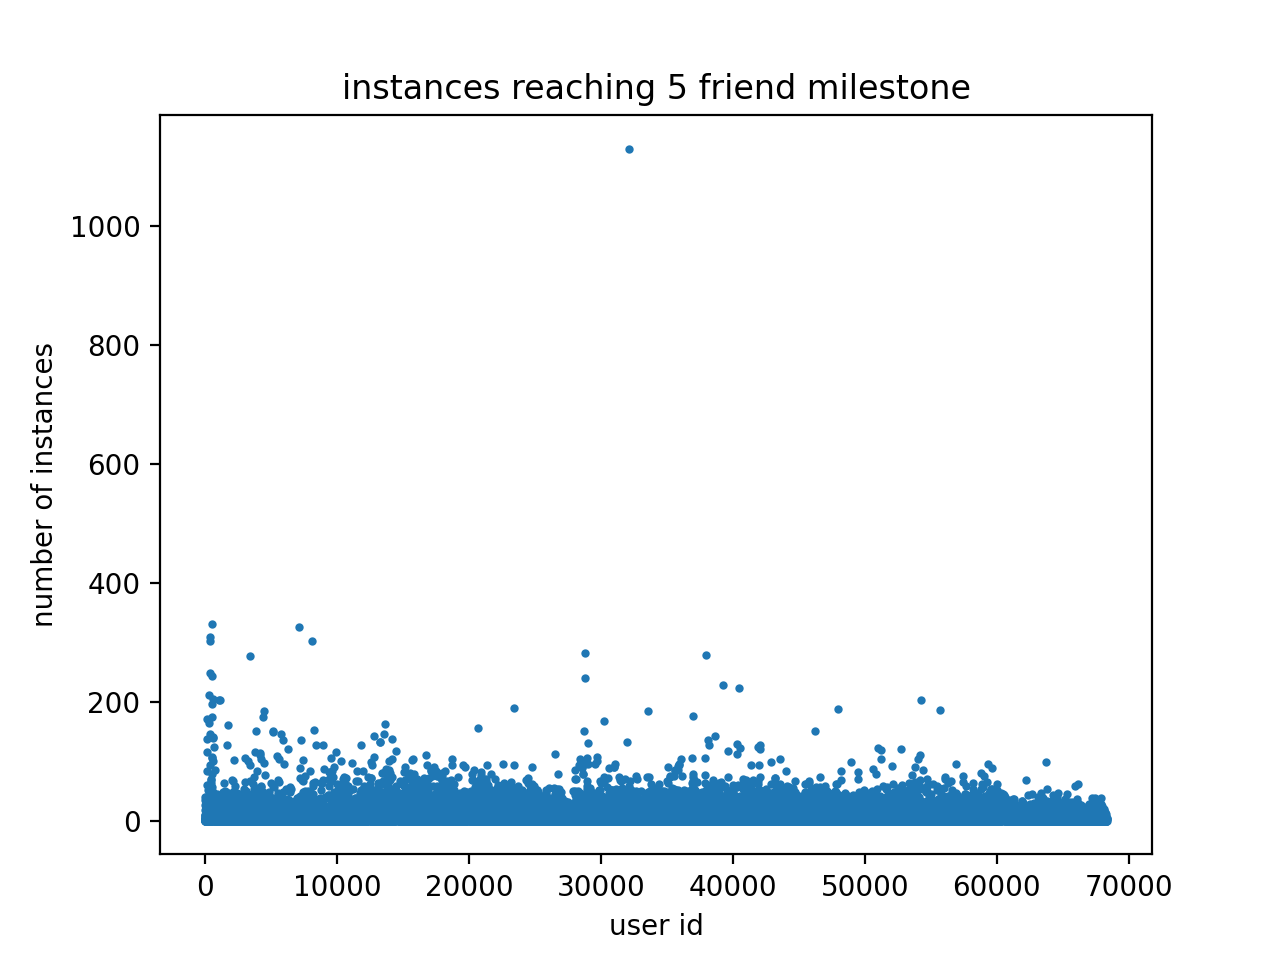

Text(0.5, 1.0, 'instances reaching 5 friend milestone')

In [202]:
plt.figure()
plt.scatter(pld.keys(), pld.values(), s=4)
plt.xlabel('user id')
plt.ylabel('number of instances')
plt.title('instances reaching 5 friend milestone')

<IPython.core.display.Javascript object>


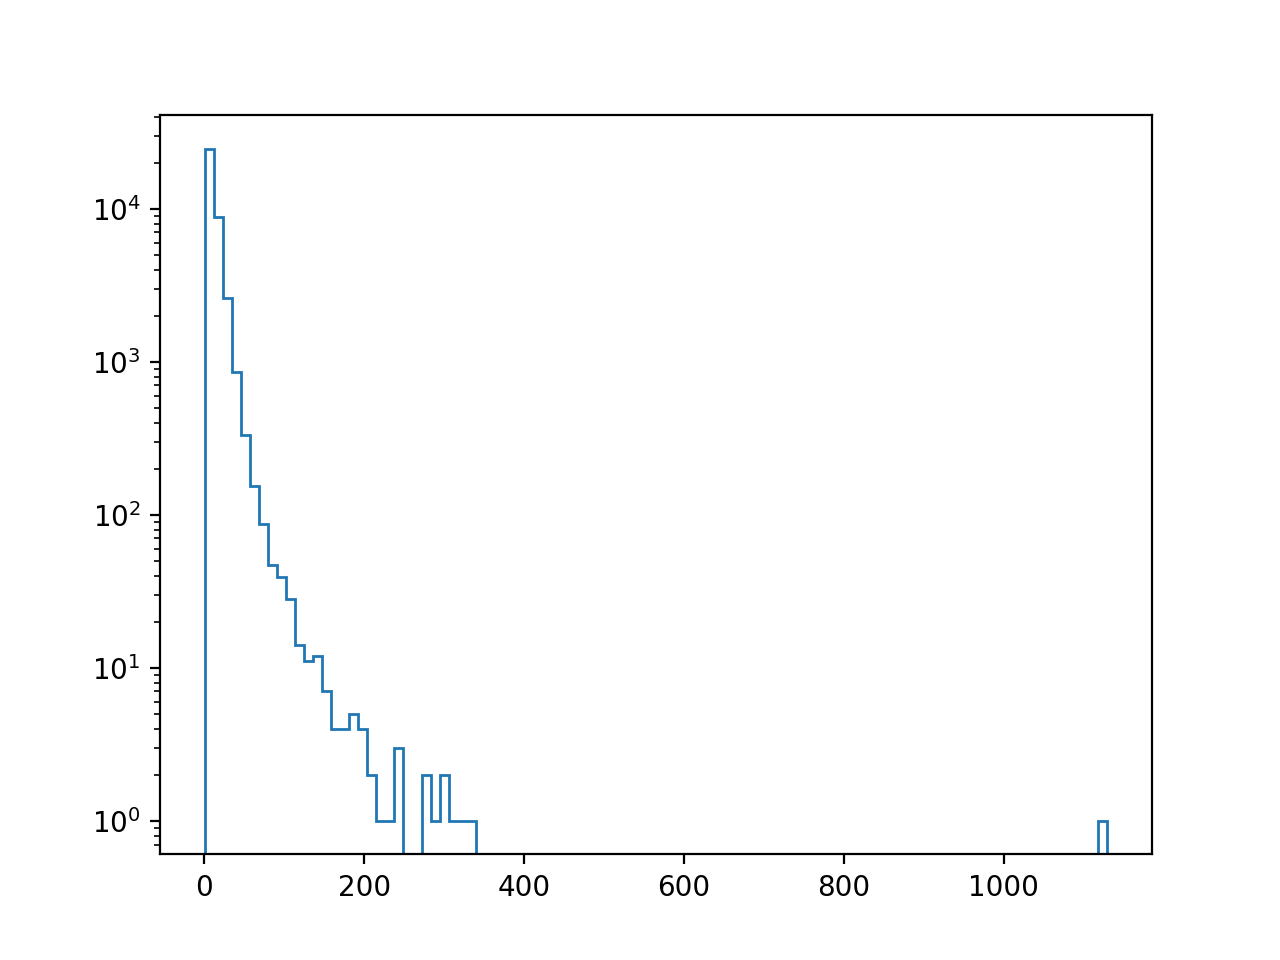

In [212]:
plt.figure()
plt.stairs(*np.histogram(list(pld.values()), bins=100))
plt.yscale('log')

In [132]:
list(pld.keys())[np.argmax(list(pld.values()))]

32121

In [153]:
# print(max_ping_user)
# print(user_event_counts[644])
uec = user_event_counts[32121]
print(uec)
print(uec['milestone_made_5_friends'])

{'on_pause': 1, 'ping': 1221, 'milestone_made_5_friends': 1129, 'player_left': 385, 'player_interaction': 84, 'make_new_friend': 2, 'player_joined': 361, 'start_diving': 19, 'stop_diving': 18, 'shout_hack_auto': 1}
1129


In [215]:

handholds = [0 if 'hand_held' not in user_event_counts[k] else user_event_counts[k]['hand_held'] for k in user_event_counts.keys()]

<IPython.core.display.Javascript object>


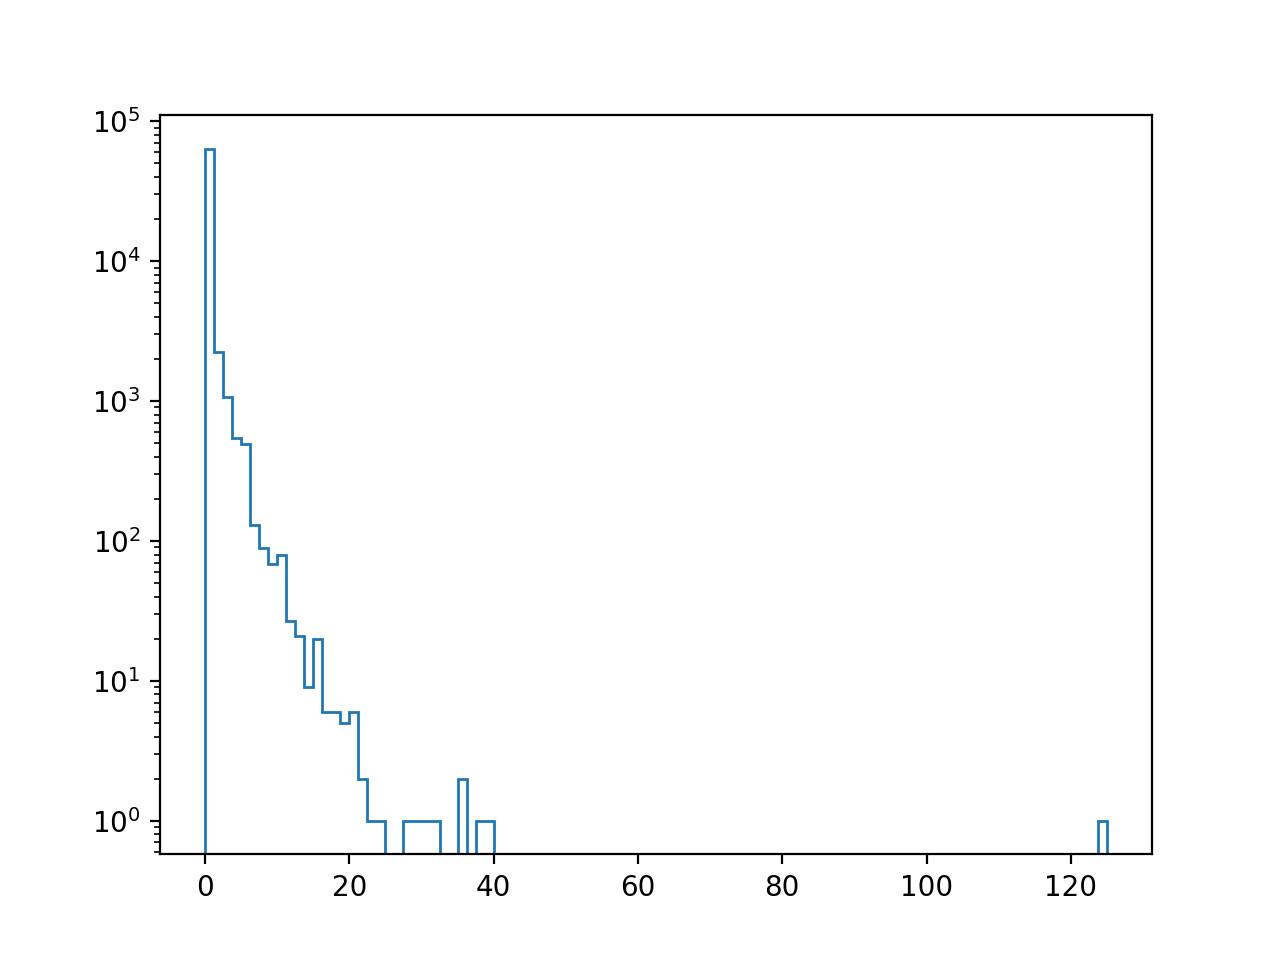

In [216]:
plt.figure()
plt.stairs(*np.histogram(list(handholds), bins=100))
plt.yscale('log')

In [217]:
list(user_event_counts.keys())[np.argmax(handholds)]



35307

In [220]:
[(x['time']-tmin, x['oneSecondAggregatedEventCounts']) for x in jsdata if x['user_id']==35307]

[(38220.0, {'ping': 1}),
 (38216.0, {'ping': 1}),
 (38200.0, {'player_left': 1}),
 (38199.0, {'player_left': 1}),
 (38193.0, {'ping': 1}),
 (38178.0, {'player_interaction': 2}),
 (38176.0, {'loaded_Dawn': 1, 'level_loaded': 1, 'player_left': 1}),
 (38163.0, {'ping': 1, 'on_low_memory': 1}),
 (38137.0, {'social_feed_impression': 1}),
 (38136.0, {'player_joined': 2}),
 (38133.0, {'ping': 1, 'player_left': 1}),
 (38131.0, {'ping': 1}),
 (38130.0, {'ping': 1}),
 (38127.0, {'ping': 1}),
 (38126.0, {'ping': 1}),
 (38125.0, {'ping': 1}),
 (38123.0, {'ping': 1}),
 (38122.0, {'ping': 1}),
 (38118.0, {'ping': 1}),
 (38116.0, {'got_wax': 5}),
 (38115.0, {'got_wax': 3}),
 (38113.0, {'ping': 1, 'social_feed_impression': 1}),
 (38111.0, {'got_wax': 2}),
 (38107.0, {'player_joined': 1}),
 (38104.0, {'ping': 1, 'player_left': 1}),
 (38103.0, {'ping': 1}),
 (38102.0, {'ping': 1}),
 (38101.0, {'ping': 1}),
 (38100.0, {'ping': 1}),
 (38099.0, {'ping': 1}),
 (38097.0, {'ping': 1}),
 (38096.0, {'ping': 1})

In [154]:
max_ping_user_activities = [data for data in jsdata if data.get('user_id') == max_ping_user[0]]
print(max_ping_user_activities)

[{'id': 8816011755, 'user_id': 644, 'time': 1694664864.0, 'platform': 'nx', 'is_beginner': True, 'level': 'Dawn', 'country_code': 'JP', 'game_server': 'NrkkgLCk', 'fps': 25, 'position_x': 451.77, 'position_y': 192, 'position_z': -903.54, 'session_id': 'c3f1e54b-5d74-431d-92d8-16d00410f5f0', 'oneSecondAggregatedEventCounts': {'ping': 1}}, {'id': 8815999814, 'user_id': 644, 'time': 1694664861.0, 'platform': 'nx', 'is_beginner': True, 'level': 'Dawn', 'country_code': 'JP', 'game_server': 'NrkkgLCk', 'fps': 25.09, 'position_x': 451.78, 'position_y': 202.01, 'position_z': -903.57, 'session_id': 'c3f1e54b-5d74-431d-92d8-16d00410f5f0', 'oneSecondAggregatedEventCounts': {'ping': 1, 'player_shout': 1}}, {'id': 8815950524, 'user_id': 644, 'time': 1694664847.0, 'platform': 'nx', 'is_beginner': True, 'level': 'Dawn', 'country_code': 'JP', 'game_server': 'NrkkgLCk', 'fps': 25.24, 'position_x': 451.76, 'position_y': 201.88, 'position_z': -903.54, 'session_id': 'c3f1e54b-5d74-431d-92d8-16d00410f5f0',

In [61]:
import math

max_ping_user_start_time = float('inf')
max_ping_user_end_time = float('-inf')


for activity in max_ping_user_activities:
    max_ping_user_start_time = min(max_ping_user_start_time, activity.get('time'))
    max_ping_user_end_time = max(max_ping_user_end_time, activity.get('time'))

In [156]:
time_duration = abs(float(max_ping_user_end_time) - float(max_ping_user_start_time))

print(f'max_ping_user_start_time:{max_ping_user_start_time}\tmax_ping_user_end_time:{max_ping_user_end_time}')
print(time_duration)

daysDifference = math.floor(time_duration/1000/60/60/24)
time_duration -= daysDifference*1000*60*60*24

hoursDifference = math.floor(time_duration/1000/60/60)
time_duration -= hoursDifference*1000*60*60

minutesDifference = math.floor(time_duration/1000/60)
time_duration -= minutesDifference*1000*60

secondsDifference = math.floor(time_duration/1000)

print(f'difference = {daysDifference} day/s {hoursDifference} hours/s {minutesDifference} minute/s {secondsDifference} second/s');

max_ping_user_start_time:1694615853.0	max_ping_user_end_time:1694664864.0
49011.0
difference = 0 day/s 0 hours/s 0 minute/s 49 second/s


In [65]:
def find_server_diversity(json_objects):
    server_country_count = {}

    for obj in json_objects:
        user_id = obj.get("user_id")
        server = obj.get("game_server")
        country = obj.get("country_code")

        if server and server not in server_country_count:
            server_country_count[server] = {}
            
        server_country_count[server][country] = server_country_count[server].get(country, 0) + 1

    return server_country_count

In [66]:
server_diversity = find_server_diversity(jsdata)

In [67]:
if server_diversity:
    print(f"Total #servers: {len(server_diversity)}")
    
    counter = 0
    for server, countries in server_diversity.items():
        if counter == 1000:
            break
        print(f"Server: {server}, countries: {countries}")
        print(f"Server: {server} has {len(countries)} countries.\n")
        counter += 1
else:
    print("No servers found")

Total #servers: 21111
Server: NCok0c6i, countries: {'US': 20, 'BR': 138, 'JP': 53, 'PL': 48, 'MX': 104, 'VN': 70, 'ID': 24, 'RU': 824, 'BO': 13, 'PH': 7, 'LV': 21}
Server: NCok0c6i has 11 countries.

Server: EuxdNAyj, countries: {'CA': 60, 'JP': 181, 'LY': 44, 'US': 34, 'ID': 29, 'IN': 1, 'CZ': 7, 'NA': 18, 'PH': 52, 'TH': 176, 'VN': 2, 'HK': 68, 'RO': 10, 'MY': 47, 'BR': 5, 'MX': 83, 'PE': 131, 'GT': 183, 'CO': 15, 'RU': 8, 'KR': 12}
Server: EuxdNAyj has 21 countries.

Server: NrkkgEqm, countries: {'TW': 2, 'IE': 1, 'CO': 9, 'VN': 1, 'US': 11, 'ID': 3, 'JP': 173, 'NL': 8, 'CN': 39, 'RU': 1, 'AU': 3}
Server: NrkkgEqm has 11 countries.

Server: I1oKiMqn, countries: {'BR': 133, 'CA': 22, 'GB': 2, 'RU': 2, 'SE': 3, 'US': 40, 'ID': 48, 'VN': 9, 'CN': 6}
Server: I1oKiMqn has 9 countries.

Server: EuxdNOCg, countries: {'SA': 1, 'JP': 55, 'US': 130, 'IN': 1, 'TH': 6, 'MY': 11, 'GB': 18, 'PL': 1, 'CN': 149, 'BR': 141, 'RU': 9, 'SD': 9, 'KR': 5, 'PA': 37, 'HK': 2, 'VN': 4}
Server: EuxdNOCg has 

In [239]:
sdc = {}
for x in range(len(server_diversity.values())):
    sdc[list(server_diversity.keys())[x]] = len(list(server_diversity.values())[x])

In [240]:
sdc

{'NCok0c6i': 11,
 'EuxdNAyj': 21,
 'NrkkgEqm': 11,
 'I1oKiMqn': 9,
 'EuxdNOCg': 16,
 'EuxdNJOm': 10,
 'NrkkgEKn': 22,
 'I1oKiGKm': 5,
 'NCok0dWm': 11,
 'I6Fy1SGh': 15,
 'NrsbodCj': 10,
 'NrsboZak': 9,
 'EuxdNGSl': 6,
 'I1r1ZuCm': 3,
 'Nrsbof2k': 18,
 'Nsp4uqii': 18,
 'NrsboTCm': 10,
 'I6Fy1eSg': 17,
 'I1UqMBKn': 11,
 'I1UqMCSk': 18,
 'EuxdNPqm': 9,
 'Nsp4upeh': 14,
 'NrkkgHWn': 8,
 'I1oKiA6o': 12,
 'NrsbofGi': 5,
 'I1oKiDSk': 11,
 'I1mQoveg': 7,
 'Nsp4upSi': 9,
 'NrkkgPmi': 7,
 'AA==': 140,
 'NCok0Y6j': 15,
 'I6Fy1e6n': 10,
 'Nsp4uvik': 11,
 'NrkkgLCk': 36,
 'I1UqMAim': 15,
 'NrkkgJej': 16,
 'I6Fy1T+h': 12,
 'NrsbofGm': 11,
 'NrsbobCj': 14,
 'I1r1ZlCi': 7,
 'I6Fy1T+m': 13,
 'I6Fy1QSo': 10,
 'I1r1ZmWn': 12,
 'I1oKiD6h': 19,
 'I1UqMPWn': 16,
 'I6Fy1ZCk': 9,
 'I1oKiI+j': 14,
 'NCok0Ryo': 8,
 'NrsboVOn': 8,
 'EuxdNA+l': 12,
 'Nsp4ugii': 19,
 'I1mQouim': 18,
 'EuxdNKCn': 14,
 'I6Fy1Rmj': 6,
 'NrkkgPOl': 20,
 'I1UqMCmo': 20,
 'I1mQosqn': 14,
 'I1UqMGKl': 10,
 'I6Fy1bKh': 21,
 'I1oKiNGj': 13,

<IPython.core.display.Javascript object>


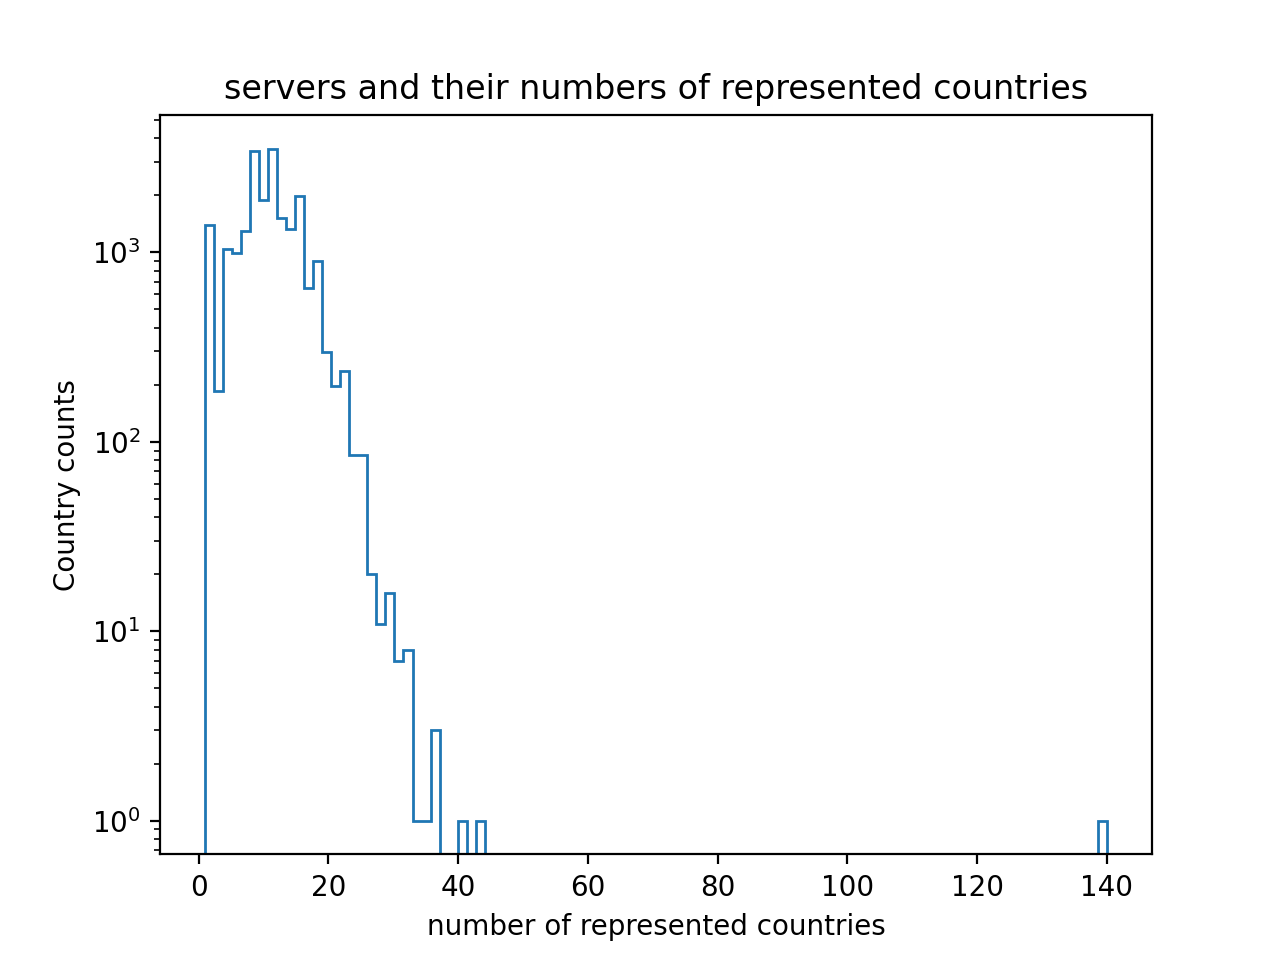

Text(0.5, 1.0, 'servers and their numbers of represented countries')

In [253]:
plt.figure()
plt.stairs(*np.histogram(list(sdc.values()), bins=100))
plt.yscale('log')

plt.xlabel('number of represented countries')
plt.ylabel('Country counts')
plt.title('servers and their numbers of represented countries')

In [246]:
len(sdc.keys())

21111

<IPython.core.display.Javascript object>


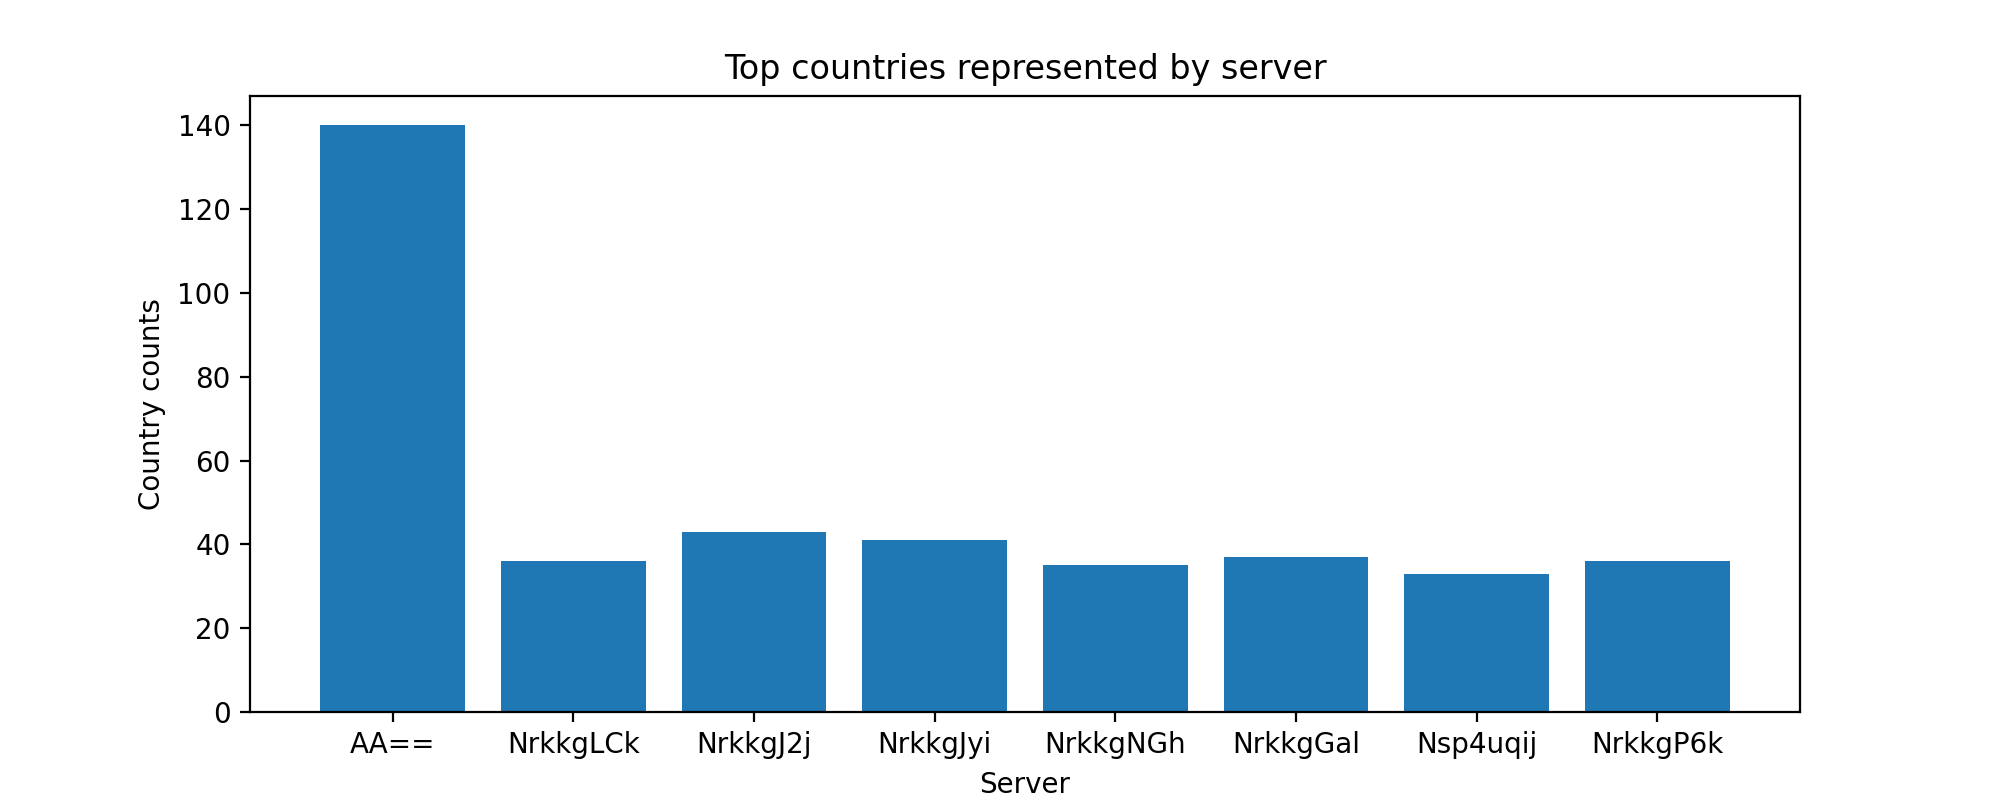

In [254]:
kv = []
vv = []
for key, value in sdc.items():
    if value > 32:
        kv.append(key)
        vv.append(value)

fig, ax = plt.subplots(figsize=(10,4))
y_pos = np.arange(len(vv))
hbars = ax.bar(y_pos, vv, align='center')
ax.set_xticks(y_pos, labels=list(kv));

plt.xlabel('Server')
plt.ylabel('Country counts')
plt.title('Top countries represented by server');